In [49]:
import torchaudio
import torch as tr
import librosa
import librosa.beat as beat
import numpy as np
import matplotlib.pyplot as plt
import nnAudio.Spectrogram
import seaborn as sns
import nnAudio

In [23]:
signal, sr = librosa.load("resources/music/m.mp3",sr=44100)

/Users/qibinliang/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [24]:
tempo, beats = beat.beat_track(y=signal, sr=sr)

In [25]:
tempo

129.19921875

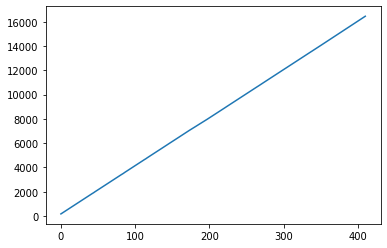

In [26]:
plt.plot(beats)

In [27]:
cqt = nnAudio.Spectrogram.CQT(sr=sr, n_bins=50,)

CQT kernels created, time used = 0.0669 seconds


In [28]:
cqt_signal = cqt(tr.tensor(signal, requires_grad=True))

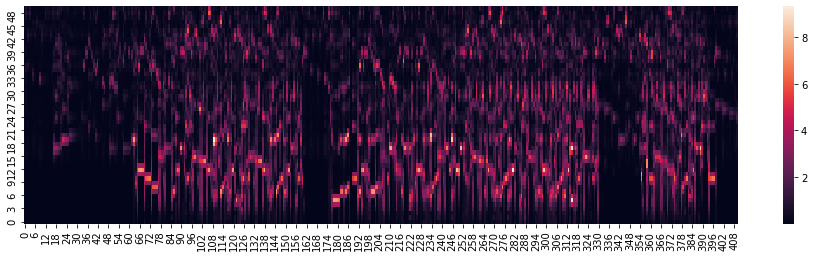

In [29]:
plt.figure(figsize=(16,4))
ax = sns.heatmap(cqt_signal.squeeze().detach().numpy()[:,beats])
ax.invert_yaxis()

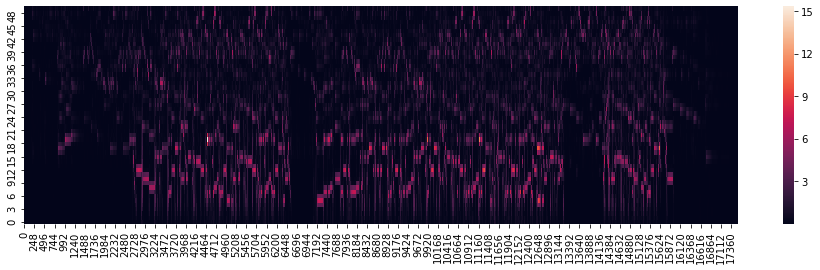

In [30]:
plt.figure(figsize=(16,4))
ax = sns.heatmap(cqt_signal.squeeze().detach().numpy())
ax.invert_yaxis()

In [31]:
cqt_signal.squeeze().detach().numpy()[:,beats]

array([[0.01977464, 0.00893321, 0.01947106, ..., 0.01933727, 0.00494646,
        0.00494734],
       [0.02539823, 0.00873356, 0.00740126, ..., 0.01706904, 0.00348438,
        0.0094497 ],
       [0.02597968, 0.01426202, 0.01536976, ..., 0.0223231 , 0.02608339,
        0.01023765],
       ...,
       [0.01208953, 0.58206564, 0.21330786, ..., 0.12013552, 0.36506456,
        0.7378209 ],
       [0.03031784, 1.0121392 , 0.44233808, ..., 0.03272967, 0.08171031,
        0.55024654],
       [0.05318192, 0.55775875, 0.23916833, ..., 0.04854789, 0.14220197,
        0.36096027]], dtype=float32)

In [32]:
beats_time = librosa.frames_to_time(beats, sr=sr)

In [33]:
(beats_time[-1] - beats_time[0])/ len(beats_time)

0.4597664012888205

In [34]:
tempo

129.19921875

[[4.1728319e-09 3.5687342e-09 5.2560849e-09 ... 7.9506701e-03
  1.3698137e-02 7.2555295e-03]
 [3.3721985e-09 2.0146942e-09 3.4619232e-09 ... 1.1211101e-02
  1.7722968e-02 2.6300993e-02]
 [9.1374663e-10 2.9118021e-09 1.2236310e-09 ... 2.0914642e-02
  8.2813501e-02 6.9014050e-02]
 ...
 [3.9458814e-09 3.9101709e-09 3.9660115e-09 ... 3.4040606e-09
  3.6811534e-09 8.9933309e-08]
 [5.3059277e-09 4.3074859e-09 4.1836330e-09 ... 8.6698115e-10
  2.0794801e-09 8.1042899e-08]
 [3.3127681e-09 3.6734733e-09 4.1284363e-09 ... 1.4403586e-09
  1.9251791e-09 8.4952759e-08]]


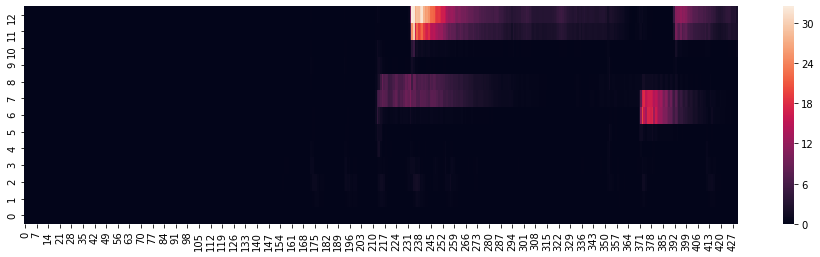

In [35]:
mel = librosa.feature.melspectrogram(signal[:44100*5], sr=sr, **{'n_mels':128})
print(mel)
plt.figure(figsize=(16,4))
ax = sns.heatmap(mel[:13,:])
ax.invert_yaxis()

In [36]:
cqt_librosa = librosa.core.constantq.cqt(signal,sr=sr,)

/Users/qibinliang/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/qibinliang/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [37]:
librosa.mel_frequencies(n_mels=128, fmin=0.0, fmax=44100.0, htk=False)

array([0.00000000e+00, 3.67844382e+01, 7.35688764e+01, 1.10353315e+02,
       1.47137753e+02, 1.83922191e+02, 2.20706629e+02, 2.57491067e+02,
       2.94275506e+02, 3.31059944e+02, 3.67844382e+02, 4.04628820e+02,
       4.41413259e+02, 4.78197697e+02, 5.14982135e+02, 5.51766573e+02,
       5.88551011e+02, 6.25335450e+02, 6.62119888e+02, 6.98904326e+02,
       7.35688764e+02, 7.72473202e+02, 8.09257641e+02, 8.46042079e+02,
       8.82826517e+02, 9.19610955e+02, 9.56395394e+02, 9.93179832e+02,
       1.03138386e+03, 1.07126092e+03, 1.11267978e+03, 1.15570003e+03,
       1.20038361e+03, 1.24679482e+03, 1.29500046e+03, 1.34506990e+03,
       1.39707521e+03, 1.45109123e+03, 1.50719571e+03, 1.56546939e+03,
       1.62599615e+03, 1.68886309e+03, 1.75416070e+03, 1.82198295e+03,
       1.89242746e+03, 1.96559561e+03, 2.04159270e+03, 2.12052812e+03,
       2.20251547e+03, 2.28767276e+03, 2.37612253e+03, 2.46799209e+03,
       2.56341367e+03, 2.66252459e+03, 2.76546751e+03, 2.87239057e+03,
      

In [38]:
tempo, beats = librosa.beat.beat_track(signal, sr=sr, hop_length=600)
mfccs = librosa.feature.mfcc(y=signal,sr=sr,**{'n_fft':1200, 'win_length':1200, 'hop_length':600})

In [39]:
mfccs.shape

(20, 14972)

In [40]:
spec_cent = librosa.feature.spectral_centroid(signal, n_fft=1200, hop_length=600, win_length=1200)

In [41]:
spec_cent[:,beats]

array([[ 429.68027363,  386.8369582 ,  479.7375216 ,  719.94473946,
         368.70917178,  384.86405131,  715.01658655,  638.32563276,
         413.78848715,  322.96260255,  600.44990497,  616.14950666,
         425.98379193,  468.16316524,  516.05882693,  823.50312597,
        1199.6616736 , 1562.04024664, 1329.98258192,  988.24479287,
         912.60211563,  856.16151977,  680.1001188 ,  607.85197233,
         950.73683173,  778.86062913,  760.51896443, 1182.99967957,
        1895.59857166, 1562.93449897, 1938.48821283, 1585.95825191,
        2086.46866395, 3245.46854885, 1072.23189306, 1912.57700036,
        1477.72087527, 1735.42527104, 1508.13328058, 1219.25659053,
        1724.78731216, 1208.30051631, 1031.18114362, 2694.66794078,
        3180.64026197,  984.41894879,  787.12049474,  823.16970904,
        2453.07032386, 1585.64429678, 1168.47173676,  998.64765728,
         706.20617727,  743.4886041 , 1183.72053842, 2102.56902402,
        1862.12750453,  780.93445529, 1316.99682

In [42]:
beats

array([  148,   182,   216,   250,   284,   318,   351,   385,   419,
         453,   487,   521,   555,   589,   622,   655,   690,   725,
         759,   792,   826,   861,   895,   929,   962,   996,  1029,
        1063,  1096,  1131,  1166,  1199,  1234,  1268,  1302,  1336,
        1369,  1404,  1437,  1472,  1506,  1541,  1573,  1603,  1636,
        1675,  1709,  1741,  1773,  1809,  1844,  1877,  1912,  1946,
        1980,  2013,  2046,  2083,  2116,  2146,  2182,  2213,  2251,
        2285,  2320,  2353,  2386,  2420,  2454,  2488,  2521,  2556,
        2590,  2624,  2656,  2692,  2726,  2759,  2794,  2828,  2862,
        2895,  2926,  2963,  2992,  3031,  3066,  3099,  3130,  3162,
        3200,  3235,  3269,  3303,  3336,  3371,  3405,  3439,  3474,
        3506,  3541,  3574,  3608,  3642,  3676,  3708,  3742,  3778,
        3812,  3846,  3879,  3913,  3948,  3981,  4010,  4049,  4083,
        4115,  4151,  4185,  4219,  4253,  4286,  4320,  4354,  4388,
        4422,  4456,

In [43]:
318/60*139

736.6999999999999

In [44]:
# There are 690 detected points, and if we consider the beginning and the end of the music, there will be no 
# more than 750 points. That means 750 pictures are enough. The program generates a picture for every 0.1 
# seconds (10 points a second), it approximately generates 3000 pictures in total. Hence, we need to select 
# 750 points over 3000 points as well as compute the difference between the two adjacent spectral centroid 
# points. Then, we need to strengthen the visual difference between two pictures to make people feel that the
# picture is rapidly changing.

In [45]:
ones_matrix = np.ones((64,64,3))

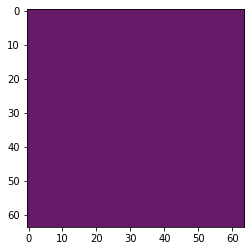

In [46]:
plt_matrix = np.copy(ones_matrix)
plt_matrix[:,:,0] = ones_matrix[:,:,0]*0.4
plt_matrix[:,:,1] = ones_matrix[:,:,1]*0.1
plt_matrix[:,:,2] = ones_matrix[:,:,2]*0.4
plt_matrix=plt_matrix.astype(np.float32)
plt.imshow(plt_matrix)

In [53]:
def change_color(matrix, color_vec):
    res = np.copy(matrix)
    res[:,:,0] = matrix[:,:,0]*color_vec[0]
    res[:,:,1] = matrix[:,:,1]*color_vec[1]
    res[:,:,2] = matrix[:,:,2]*color_vec[2]
    return res
init_color = np.random.randint((100,3))

In [89]:
(0.4-0.2)/690

0.0002898550724637681